In [3]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [5]:
# 학습셋과 테스트셋 지정하기
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 5000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [6]:
# 데이터 전처리
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen = 100)

In [9]:
# 모델의 설정
model = Sequential()
model.add(Embedding(5000, 100))
model.add(Dropout(0.5))
model.add(Conv1D(64, 5, padding = 'valid', activation = 'relu', strides = 1))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 100)         500000    
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 64)          32064     
_________________________________________________________________
lstm_1 (LSTM)                (None, 55)                26400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 56        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 558,520
Trainable params: 558,520
Non-trainable params: 0
________________________________________________

In [10]:
# 모델의 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
# 모델의 실행
history = model.fit(x_train, y_train, batch_size = 100, epochs=5, validation_data = (x_test, y_test))

Epoch 1/5
250/250 [==============================] - 51s 194ms/step - loss: 0.5708 - accuracy: 0.6554 - val_loss: 0.3614 - val_accuracy: 0.8414
Epoch 2/5
250/250 [==============================] - 48s 191ms/step - loss: 0.2966 - accuracy: 0.8792 - val_loss: 0.3342 - val_accuracy: 0.8546
Epoch 3/5
250/250 [==============================] - 48s 190ms/step - loss: 0.2422 - accuracy: 0.8984 - val_loss: 0.3477 - val_accuracy: 0.8509
Epoch 4/5
250/250 [==============================] - 49s 195ms/step - loss: 0.2056 - accuracy: 0.9188 - val_loss: 0.3326 - val_accuracy: 0.8543
Epoch 5/5
250/250 [==============================] - 48s 191ms/step - loss: 0.1833 - accuracy: 0.9297 - val_loss: 0.3509 - val_accuracy: 0.8546


In [12]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

782/782 [==============================] - 15s 19ms/step - loss: 0.3509 - accuracy: 0.8546

 Test Accuracy: 0.8546


In [14]:
# 테스트셋의 오차
y_vloss = history.history["val_loss"]

In [15]:
# 학습셋의 오차
y_loss = history.history["loss"]

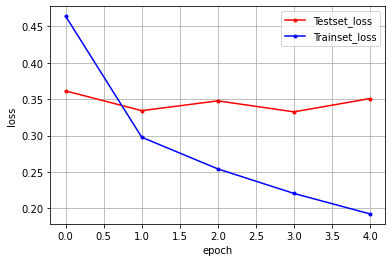

In [16]:
# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c='red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()